In [3]:
import networkx as nx
from collections import defaultdict

# Closeness Rank Counterexample

In [8]:
def counterexample(jj=23,rr=4,kk=5):
    G = nx.Graph()
    G.add_nodes_from([0,1])
    for i in range(jj):
        G.add_edge("s0_{}".format(i), 0)
    for i in range(rr):
        G.add_edge("s1_{}".format(i), 1)
        G.add_edge("4_{}".format(i), 2)
    for i in range(kk):
        G.add_edge("s3_{}".format(i), 3)
    G.add_edges_from([(0,"a"), ("a", "b"), ("b", 3), (3, 2), (2, 1)])
    H = G.copy()
    H.add_edge(0, 1)
    labels = defaultdict(lambda x: "")
    for i in range(4):
        labels[i] = i
    for i in range(rr):
        labels["4_{}".format(i)] = 4
    return G, H, labels

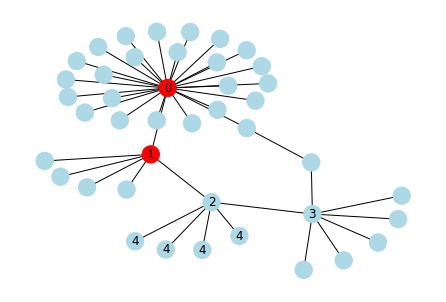

In [18]:
G, H, labels = counterexample()
nx.draw(H, nx.kamada_kawai_layout(H), with_labels=True, labels=labels, node_color=["red"]*2+["lightblue"]*(len(G)-2))

Here are two dictionaries whose keys are the nodes of the graphs $G$ and $H$ (the first representative of nodes that have replicas), and whose values are expressions in $r$, $j$, $k$ with the peripherality of the corresponding node in $G$ and $H$.

In [19]:
k=var('k')
j=var('j')
r=var('r')
pre = {0:      11 * r + 4 * k + j + 15, 
       1:       3 * r + 3 * k + 6 * j + 15, 
       2:       3 * r + 2 * k + 5 * j + 11, 
       3:       5 * r +     k + 4 * j +  9, 
       "a":     9 * r + 3 * k + 2 * j + 11, 
       "b":     7 * r + 2 * k + 3 * j +  9,
       "s0_0": 13 * r + 5 * k + 2 * j + 19, 
       "s1_0":  5 * r + 4 * k + 7 * j + 19, 
       "4_0":   5 * r + 3 * k + 6 * j + 15, 
       "s3_0":  7 * r + 2 * k + 5 * j + 13}
post = {0:      5 * r + 4 * k +     j +  9, 
        1:      3 * r + 3 * k + 2 * j +  9, 
        2:      3 * r + 2 * k + 3 * j +  9, 
        3:      5 * r +     k + 4 * j +  9, 
        "a":    7 * r + 3 * k + 2 * j +  9, 
        "b":    7 * r + 2 * k + 3 * j +  9, 
        "s0_0": 7 * r + 5 * k + 2 * j + 13, 
        "s1_0": 5 * r + 4 * k + 3 * j + 13, 
        "4_0":  5 * r + 3 * k + 4 * j + 13, 
        "s3_0": 7 * r + 2 * k + 5 * j + 13}

For specific values of $j$,$k$,$r$, actually compute the example graph and numerically evaluate its peripheralities.

In [20]:
jj=50
kk=40
rr=70
G,H,labels = counterexample(jj, rr, kk)
per_before = {x: round((G.number_of_nodes() - 1) / y) for x,y in nx.closeness_centrality(G).items()}
per_after = {x: round((G.number_of_nodes() - 1) / y) for x,y in nx.closeness_centrality(H).items()}

Assess that the expressions do coincide with the values computed, and with other unsimplified formulas.

In [21]:
assert per_before[0]       == jj + 1 + 2 + 3 + 4 * kk + 4 + 5 * rr + 5 + 6 * rr  == pre[0](k=kk)(r=rr)(j=jj)
assert per_before[1]       == rr + 1 + 2 * rr + 2 + 3 * kk + 3 + 4 + 5 + 6 * jj  == pre[1](k=kk)(r=rr)(j=jj)
assert per_before[2]       == 1 + 2 * rr + rr + 1 + 2 * kk + 2 + 3 + 4 + 5 * jj  == pre[2](k=kk)(r=rr)(j=jj)
assert per_before[3]       == 2 + 3 * rr + 1 + 2 * rr + kk + 1 + 2 + 3 + 4 * jj  == pre[3](k=kk)(r=rr)(j=jj)
assert per_before["a"]     == 1 + 2 * jj + 1 + 2 + 3 * kk + 3 + 4*rr + 4 + 5*rr  == pre["a"](k=kk)(r=rr)(j=jj)
assert per_before["b"]     == 2 + 3 * jj + 1 + 1 + 2 * kk + 2 + 3*rr + 3 + 4*rr  == pre["b"](k=kk)(r=rr)(j=jj)
assert per_before["s0_0"]  == 1+2*(jj-1)+ 2 + 3 + 4 + 5*kk + 5 + 6*rr + 6 + 7*rr == pre["s0_0"](k=kk)(r=rr)(j=jj)
assert per_before["s1_0"]  == 1+2*(rr-1)+ 2 + 3*rr + 3 + 4*kk + 4 + 5 + 6 + 7*jj == pre["s1_0"](k=kk)(r=rr)(j=jj)
assert per_before["4_0"]   == 1+2*(rr-1)+ 2 + 3*rr + 2 + 3*kk + 3 + 4 + 5 + 6*jj == pre["4_0"](k=kk)(r=rr)(j=jj)
assert per_before["s3_0"]  == 1+2*(kk-1)+ 2 + 3*rr + 3 + 4*rr + 2 + 3 + 4 + 5*jj == pre["s3_0"](k=kk)(r=rr)(j=jj)

In [22]:
assert per_after[0]        == jj+2 + 2*(rr+2) + 3*(rr+1) + 4 * kk                == post[0](k=kk)(r=rr)(j=jj)
assert per_after[1]        == rr+2 + 2*(rr+jj+2) + 3*(kk+1)                      == post[1](k=kk)(r=rr)(j=jj)
assert per_after[2]        == rr+2 + 2*(rr+1+kk+1) + 3*(jj+1)                    == post[2](k=kk)(r=rr)(j=jj)
assert per_after[3]        == kk+2 + 2*(1+rr+1) + 3*(rr+1) + 4*jj                == post[3](k=kk)(r=rr)(j=jj)
assert per_after["a"]      == 2 + 2*(jj+1+1) + 3*(rr+1+kk) + 4*rr                == post["a"](k=kk)(r=rr)(j=jj)
assert per_after["b"]      == 2 + 2*(kk+1+1) + 3*(rr+1+jj) + 4*rr                == post["b"](k=kk)(r=rr)(j=jj)
assert per_after["s0_0"]   == 1 + 2*(jj-1+2) + 3*(rr+1+1) + 4*(rr+1)+5*kk        == post["s0_0"](k=kk)(r=rr)(j=jj)
assert per_after["s1_0"]   == 1 + 2*(rr-1+2) + 3*(rr+1+jj+1) + 4*(kk+1)          == post["s1_0"](k=kk)(r=rr)(j=jj)
assert per_after["4_0"]   == 1 + 2*(rr-1+2) + 3*(rr+kk+1+1) + 4*(1+jj)          == post["4_0"](k=kk)(r=rr)(j=jj)
assert per_after["s3_0"]   == 1 + 2*(kk-1+2) + 3*(rr+1+1) + 4*(rr+1) + 5 * jj    == post["s3_0"](k=kk)(r=rr)(j=jj)

Show that setting $k=18r$ and $j=5r$, and imposing that vertex 0 loses rank w.r.t. any vertex labelled with 4, that vertex 0 is less important than vertex 1 (bottom violation), and that the relative position of vertex 0 with respect to all other vertices does not change, we get that these conditions hold for any $r\geq2$.

In [23]:
jexp=5*r
kexp=18*r

In [24]:
a=[
    (pre[0]>pre[1])(k=kexp)(j=jexp),
    (post[0]>post[1])(k=kexp)(j=jexp),

    (pre[0]<pre["4_0"])(k=kexp)(j=jexp),
    (post[0]>post["4_0"])(k=kexp)(j=jexp),

    (pre[0]>pre[2])(k=kexp)(j=jexp),
    (post[0]>post[2])(k=kexp)(j=jexp),

    (pre[0]>pre[3])(k=kexp)(j=jexp),
    (post[0]>post[3])(k=kexp)(j=jexp),

    (pre[0]>pre["a"])(k=kexp)(j=jexp),
    (post[0]>post["a"])(k=kexp)(j=jexp),

    (pre[0]>pre["b"])(k=kexp)(j=jexp),
    (post[0]>post["b"])(k=kexp)(j=jexp),

    (pre[0]<pre["s0_0"])(k=kexp)(j=jexp),
    (post[0]<post["s0_0"])(k=kexp)(j=jexp),

    (pre[0]<pre["s1_0"])(k=kexp)(j=jexp),
    (post[0]<post["s1_0"])(k=kexp)(j=jexp),

    (pre[0]>pre["s3_0"])(k=kexp)(j=jexp),
    (post[0]>post["s3_0"])(k=kexp)(j=jexp),

    jexp>0, kexp>0]
solve(a,r)

[[(4/3) < r]]

Show that setting $k=12r+17$ and $j=4r+4$, and imposing that vertex 0 loses rank w.r.t. any vertex labelled with 4, that vertex 0 is more important than vertex 1 (top violation), and that the relative position of vertex 0 with respect to all other vertices does not change, we get that these conditions hold for any $r>0$.

In [25]:
jexp=4*r+4
kexp=12*r+17

In [26]:
a=[
    (pre[0]<pre[1])(k=kexp)(j=jexp),
    (post[0]>post[1])(k=kexp)(j=jexp),

    (pre[0]<pre["4_0"])(k=kexp)(j=jexp),
    (post[0]>post["4_0"])(k=kexp)(j=jexp),

    (pre[0]>pre[2])(k=kexp)(j=jexp),
    (post[0]>post[2])(k=kexp)(j=jexp),

    (pre[0]>pre[3])(k=kexp)(j=jexp),
    (post[0]>post[3])(k=kexp)(j=jexp),

    (pre[0]>pre["a"])(k=kexp)(j=jexp),
    (post[0]>post["a"])(k=kexp)(j=jexp),

    (pre[0]>pre["b"])(k=kexp)(j=jexp),
    (post[0]>post["b"])(k=kexp)(j=jexp),

    (pre[0]<pre["s0_0"])(k=kexp)(j=jexp),
    (post[0]<post["s0_0"])(k=kexp)(j=jexp),

    (pre[0]<pre["s1_0"])(k=kexp)(j=jexp),
    (post[0]<post["s1_0"])(k=kexp)(j=jexp),

    (pre[0]>pre["s3_0"])(k=kexp)(j=jexp),
    (post[0]>post["s3_0"])(k=kexp)(j=jexp),

    kexp>0, jexp>0]
solve(a,r)

[[-1 < r]]